# **What are the major determinants of the gross revenue of a movie?**
Can you help movie producers know what factors really drive the revenue they make from movies?

## Background
A movie has many attributes such as genre, company of production, year of release, budget, IMDb user rating, country, gross revenue and others. Which of these factors most impact the gross revenue that is earned from the movie?

The stakeholders need to understand these factors and their level of impact on revenue so that they are informed to invest their resources into the right channnels based on insights derived from data rather than making guesses which can be costly.




## The data
This is a Netflix movies data set. There are 7668 movies in the dataset (220 movies per year, 1980-2020) scraped from IMDb. Each movie has the following attributes:
- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release

## Importing necessary libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create


## A glance at the data

In [3]:
#Read the data
df = pd.read_csv(r"C:/Users/Joseph/Desktop/Data Analyst with Python/Portfolio Projects/Correlation/movies.csv")
#Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Getting to know our data set

In [4]:
#Validating data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Observations

The released attribute is the year of release and the data type must be an integer. It must be converted from object type to  integer type.

The gross and the budget attributes are have no fractional parts and can be converted from float to integer types to make them easier to read.

Before the data types will be converted and desccriptive statistics given, we must check for missing data as such points will interfere with the data conversion and affect our summaries.

## Data Cleaning

#### Checking for missing values in the entire data set

In [5]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

#### What is the percentage of missing data in each column?

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Removing rows in columns where missing data is not more than 5% of our observations

In [10]:
#Dealing with missing data
threshold = len(df)* 0.05
cols_to_drop = df.columns[df.isna().sum() <= threshold]
df.dropna(subset = cols_to_drop, inplace =True)
print(df.isna().sum())

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64


#### Imputing for remaining missing data
- The distribution of the data should determine which average is best to impute for the remaining missing values in the budget attribute
- The median is the best average to impute for missing values in a data with skewed distribution

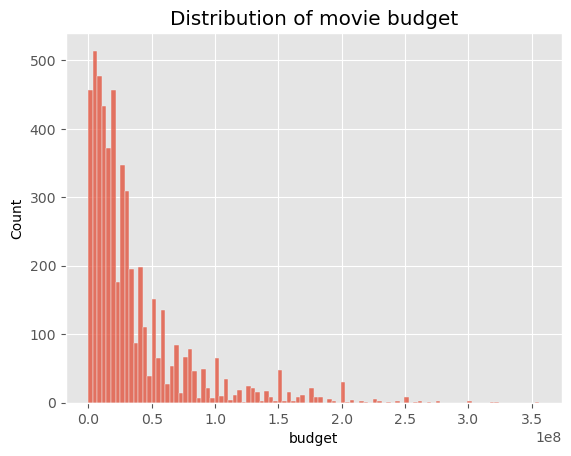

In [11]:
#A histogram to show the distribution of movie budget
sns.histplot(data=df, x='budget', bins = 100)
plt.title('Distribution of movie budget')
plt.show()

In [13]:
#Imputing for missing values with the median
print(df.columns[df.isnull().sum() > 0])

df_dict = df.groupby('genre')['budget'].median().to_dict()
df['budget'] = df['budget'].fillna(df['genre'].map(df_dict))
print(df.isna().sum())

Index(['budget'], dtype='object')
name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      3
gross       0
company     0
runtime     0
dtype: int64


In [14]:
print(df_dict)

{'Action': 40000000.0, 'Adventure': 25000000.0, 'Animation': 70000000.0, 'Biography': 20000000.0, 'Comedy': 17000000.0, 'Crime': 15000000.0, 'Drama': 16000000.0, 'Family': 17000000.0, 'Fantasy': 9000000.0, 'Horror': 10000000.0, 'Music': nan, 'Musical': nan, 'Mystery': 24000000.0, 'Romance': 22000000.0, 'Sci-Fi': 16500000.0, 'Sport': nan, 'Thriller': 13200000.0, 'Western': 10500000.0}


#### Why are there 3 missing rows after imputing budget using median?
- The Music, Musical and Sports genres have no budget entries
- We drop these rows of data

In [15]:
df[df["genre"].isin(['Music', 'Musical', 'Sports'])]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
162,Diva,R,Music,1981,"April 23, 1982 (United States)",7.2,12000.0,Jean-Jacques Beineix,Daniel Odier,Wilhelmenia Fernandez,France,NaN,110014.0,Les Films Galaxie,117.0
7613,42nd Street: The Musical,Not Rated,Musical,2019,"May 1, 2019 (United States)",7.9,321.0,Mark Bramble,Mark Bramble,Bonnie Langford,United Kingdom,NaN,2217255.0,Julian Marsh Pictures,155.0


In [16]:
#Drop remaining missing rows
df.dropna(subset = 'budget', inplace = True)

#### Correcting the year attribute
Some of the the years in the 'year' column do not match the years in the released column. The released column contains the year date and country in which the movie was released. We will extract the year data from the released column to fix this problem.

In [17]:
#Creating correct year column
df['correct_year'] = df['released'].astype(str).str.split(',').str[1].str[1:5]
df = df.reindex(sorted(df.columns), axis =1)
df.head()

,budget,company,correct_year,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,1980,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,1980,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,1980,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,1980,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,1980,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


#### The budget and gross data types are converted from float to integer types for easier readability

In [18]:
#Data validation - changing data type of some columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

_Our data is clean for analysis_!!!

## Getting to know our data more

In [19]:
df.describe()

,budget,gross,runtime,score,votes,year
count,7.409000e+03,7.409000e+03,7409.000000,7409.000000,7.409000e+03,7409.000000
mean,3.205658e+07,7.902508e+07,107.440545,6.396666,9.079857e+04,2000.638413
std,3.663494e+07,1.662427e+08,18.511985,0.963136,1.653709e+05,11.024481
min,6.000000e+03,3.090000e+02,63.000000,1.900000,1.050000e+02,1980.000000
25%,1.320000e+07,4.636169e+06,95.000000,5.800000,1.000000e+04,1991.000000
50%,1.700000e+07,2.042113e+07,104.000000,6.500000,3.400000e+04,2001.000000
75%,4.000000e+07,7.647105e+07,116.000000,7.100000,9.600000e+04,2010.000000
max,3.560000e+08,2.847246e+09,366.000000,9.300000,2.400000e+06,2020.000000


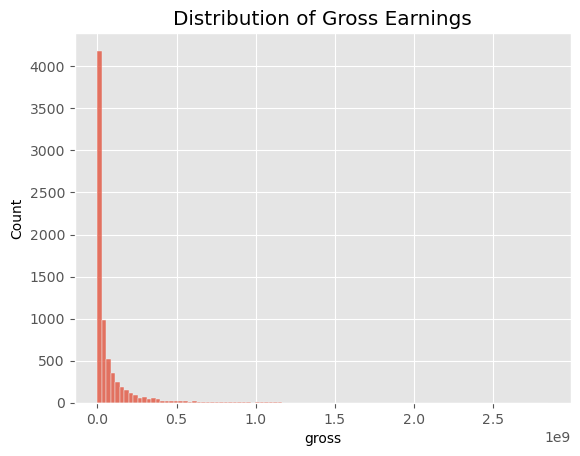

In [20]:
sns.histplot(data=df, x='gross', bins = 100)
plt.title('Distribution of Gross Earnings')
plt.show()
#Revenue distribution is skewed to the right

### What's in our Netflix movies data?

On average, movies in our data set have an IMDb rating of about 6.4. The length of movies is on average 107 minutes.
The movie data set is quite extensive, including four decades of movies from 1980 to 2020

The amount of money producers spend to make movies ranges from as low as 6000 dollars to 360 million dollars. A good question to find answers to is 'what genre of movies cost 8 figures to make and do the investments pay off?'. Revenue earned from movies ranges from 309 dollars to a whooping 2.8 billion dollars.

The distribution of gross revenue is skewed to the right. This in context means that majority of movies generate revenues between 300 dollars to 500 million dollars. A very few movies generate higher than 500 million dollars.



### Delving deeper

309.0 2847246203.0


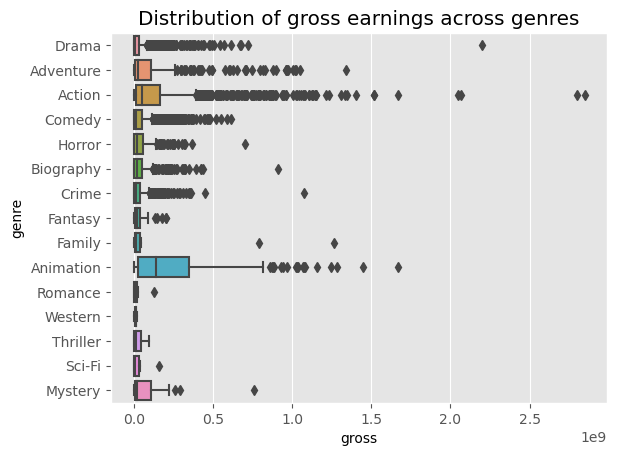

In [69]:
#Validating the range of our dataset
print(df['gross'].min(), df['gross'].max())

#Boxplot to know the distribution of gross earnings aggregated on the levels of genre
sns.boxplot(data=df, x="gross", y='genre')
plt.title("Distribution of gross earnings across genres")
plt.show()

Some action movies are really killing it!!!

Animation, Action, Adventure, Comedy and Drama are the top revenue generating movies making more than 500 million dollars in revenue. 

Western, Romance and Sci-Fi genres are the least revenue generating genres on Netflix.

### A summary table to break down the average budget and gross

In [22]:
#Summarizing data
summary1 = df.groupby('genre')['gross'].median()

summary2 = df.groupby('genre').agg(
    mean_rating_score = ('score', 'mean'),
    median_budget = ('budget', 'median'),
median_gross = ('gross', 'median'), 
std_gross = ('gross', 'std'))

summary_table = pd.DataFrame(summary2.sort_values(by ='median_gross', ascending = False))
summary_table

,mean_rating_score,median_budget,median_gross,std_gross
genre,,,,
Animation,6.762236,70000000.0,140073390.0,2.850959e+08
Action,6.213205,40000000.0,52142420.5,2.478104e+08
Adventure,6.290453,25000000.0,28013733.0,2.053388e+08
Horror,5.787171,10000000.0,20731057.0,7.438023e+07
Fantasy,6.050000,9000000.0,19658386.0,5.446863e+07
Mystery,6.665000,24000000.0,19255503.5,1.806767e+08
Biography,7.042191,20000000.0,19131246.0,8.326669e+07
Comedy,6.199083,17000000.0,16584895.0,7.113312e+07
Crime,6.681157,15000000.0,12293449.0,7.751929e+07


### How much are producers spending and are they getting returns on their investments?
The median is the best to describe the average budget and gross since the distributions of both attributes are skewed to the right. Animation movies cost the most to make with an average of 70 million dollars. Action movies cost on average 40 million dollars and Adventure movies, 25 million dollars.

The top four revenue generating genres on average are Animation, Action, Adventure and Horror. There is a considerable variation in the average figures, meaning that although in general most movies in these genres generate much, there are also movies in the same category performing far below the average. The deviations are in hundreds of millions of dollars.

_Action movies such as the **'Avatar'** with gross of **2.85 billion dollars**, **'Avengers:Endgame'** with gross **2.80 billion dollars** and the Drama movie, **'Titanic'**, with gross **2.2 billion dollars** are exceptional revenue earners and affect greatly the spread in figures across their categories._

The summary suggests there is a relationship between budget and gross earnings across movie genres.



In [45]:
pd.set_option('display.max_rows', None)
df_ordered_by_gross = df.sort_values(by=['gross'], inplace=False, ascending=False)
df_ordered_by_gross.head()

,budget,company,correct_year,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,2112,29,53,1106,0,2847246203,514,5,678,162.0,7.8,2196,1100000.0,1703,2009
7445,356000000,1505,39,53,159,0,2797501328,516,5,176,181.0,8.4,2105,903000.0,707,2019
3045,200000000,2112,17,53,1106,6,2201647264,6665,5,686,194.0,7.8,1501,1100000.0,1703,1997
6663,245000000,1443,35,53,1076,0,2069521700,4955,5,680,138.0,7.8,493,876000.0,2446,2015
7244,321000000,1505,38,53,159,0,2048359754,517,5,185,149.0,8.4,2105,897000.0,707,2018


# Relationship between movie attributes

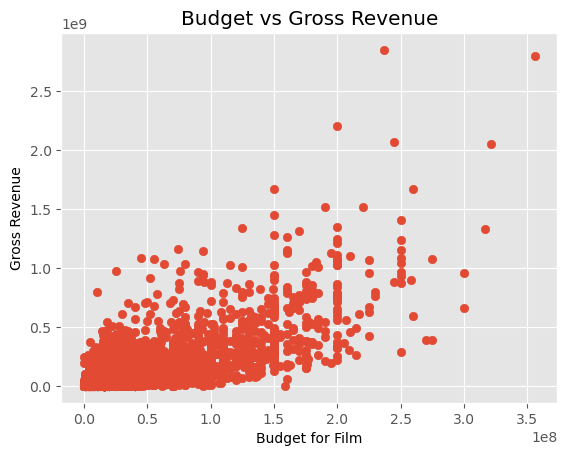

In [24]:
#Scatter plot of budget against gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

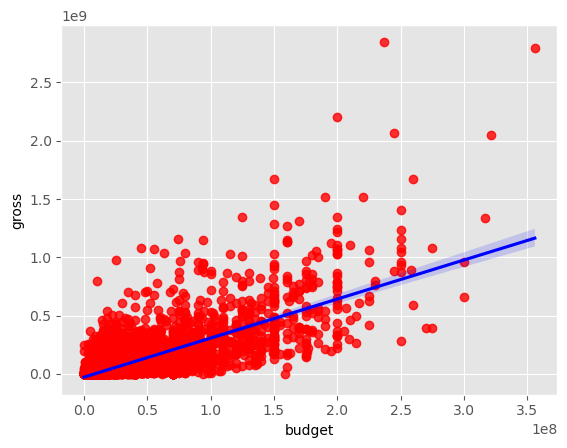

In [25]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red', },line_kws={'color':'blue'})

There is a positive correlation between budget and gross earnings. As the budget spent on movies increases, there is an increase in gross earnings. What is the strength of this relationship? We make use of the correlation coefficient.

In [26]:
df.corr(method='pearson')

C:\Users\Joseph\AppData\Local\Temp\ipykernel_8732\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,budget,gross,runtime,score,votes,year
budget,1.000000,0.738204,0.265138,0.058817,0.452229,0.293722
gross,0.738204,1.000000,0.245397,0.188241,0.631074,0.259085
runtime,0.265138,0.245397,1.000000,0.396865,0.310286,0.114071
score,0.058817,0.188241,0.396865,1.000000,0.415439,0.093993
votes,0.452229,0.631074,0.310286,0.415439,1.000000,0.219213
year,0.293722,0.259085,0.114071,0.093993,0.219213,1.000000


#### There is a high positive correlation between budget and gross.

## Correlation heatmap for numerical attributes
Are there other attributes apart from budget which correlate with gross earnings?

C:\Users\Joseph\AppData\Local\Temp\ipykernel_8732\2376391163.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= df.corr(method='pearson')


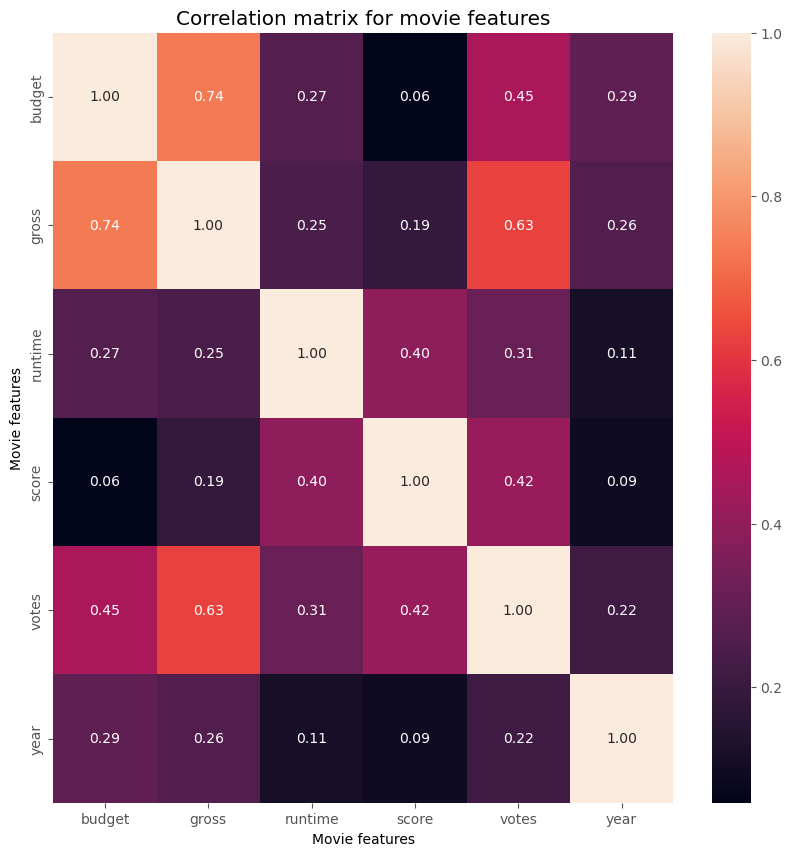

In [27]:
#Plotting correlation heatmap
plt.figure(figsize=(10, 10))
correlation_matrix= df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt='0.2f')
plt.title('Correlation matrix for movie features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

There is also a strong positive correlation between votes(IMDb user ratings) and gross earnings. This means there is a relationship between user ratings and how much revenue movies generate.

## Converting categorical variables to numerical variables to measure relationship with gross earnings

In [46]:
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
      df_numerized[col_name] = df_numerized[col_name].astype('category')
      df_numerized[col_name]= df_numerized[col_name].cat.codes
      
df_numerized.sort_values(by='gross', inplace=False, ascending=False).head()

,budget,company,correct_year,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5445,237000000,2112,29,53,1106,0,2847246203,514,5,678,162.0,7.8,2196,1100000.0,1703,2009
7445,356000000,1505,39,53,159,0,2797501328,516,5,176,181.0,8.4,2105,903000.0,707,2019
3045,200000000,2112,17,53,1106,6,2201647264,6665,5,686,194.0,7.8,1501,1100000.0,1703,1997
6663,245000000,1443,35,53,1076,0,2069521700,4955,5,680,138.0,7.8,493,876000.0,2446,2015
7244,321000000,1505,38,53,159,0,2048359754,517,5,185,149.0,8.4,2105,897000.0,707,2018


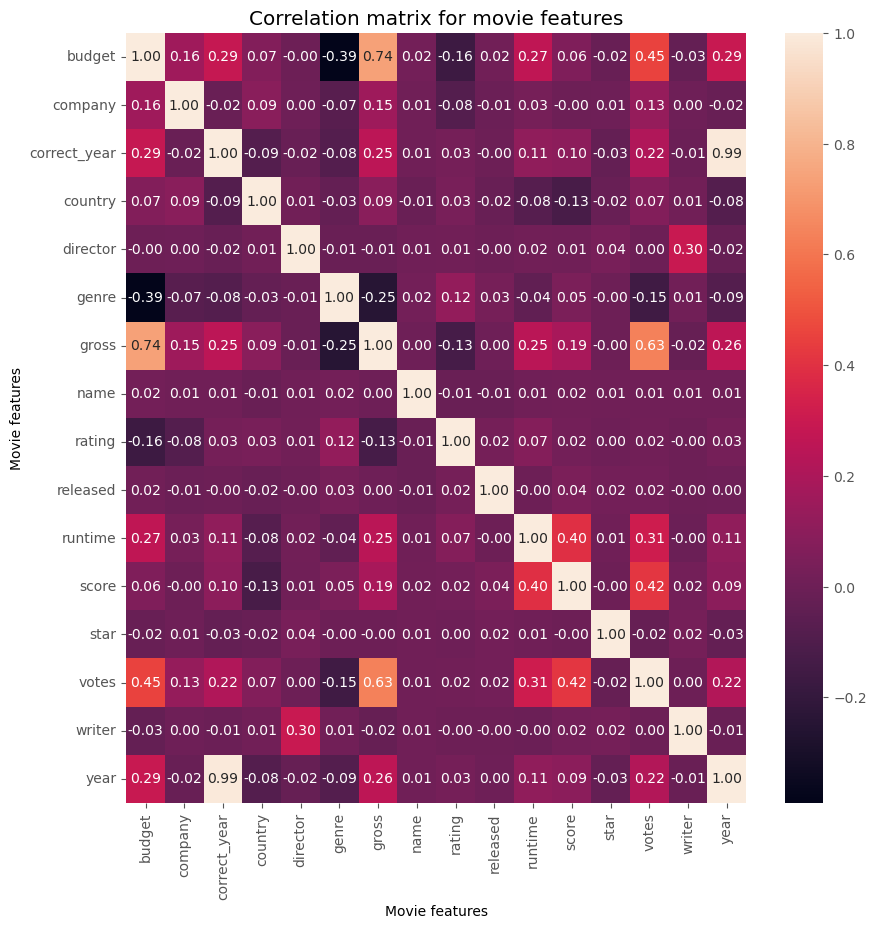

In [30]:
#Correlation heatmap for all attributes
correlation_matrix1 = df_numerized.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix1, annot=True, fmt='0.2f')
plt.title('Correlation matrix for movie features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [38]:
#Identifying strongly correlated features
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes         gross           0.631074
gross         votes           0.631074
              budget          0.738204
budget        gross           0.738204
year          correct_year    0.993393
correct_year  year            0.993393
budget        budget          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
correct_year  correct_year    1.000000
company       company         1.000000
writer        writer          1.000000
year          year            1.000000
dtype: float64

#### Budget and vote have the highest correlation to gross earnings

## ⚖️Recommendations
- Movie producers should invest money to deliver to the best quality of their scripts as budget has a relationship with gross earnings. The right cast and quality elements needed to produce quality movies should not be traded for objective to superficially reduce the budget size.
- Movies which are highly rated are associated with high gross earnings. Producers should make movies with cohesive elements that appeal to their audience.


### Reference
- Dataset- https://www.kaggle.com/datasets/danielgrijalvas/movies

## Thank you

## Joseph Tugah